https://chatgpt.com/share/67f2c6ad-0888-8005-91ee-91c48419ad52

# Tkinter

## Primjer kalkulator

```python

import tkinter as tk

def on_click(event):
    btn_text = event.widget["text"]
    if btn_text == "=":
        try:
            result = str(eval(entry.get()))
            entry.delete(0, tk.END)
            entry.insert(tk.END, result)
        except:
            entry.delete(0, tk.END)
            entry.insert(tk.END, "Error")
    elif btn_text == "C":
        entry.delete(0, tk.END)
    else:
        entry.insert(tk.END, btn_text)

root = tk.Tk()
root.title("Calculator")

entry = tk.Entry(root, font=("Arial", 18), justify='right', bd=10)
entry.grid(row=0, column=0, columnspan=4, sticky="news")

buttons = [
    '7', '8', '9', '/',
    '4', '5', '6', '*',
    '1', '2', '3', '-',
    '0', '.', 'C', '+'
]

for i, text in enumerate(buttons):
    row, col = divmod(i, 4)
    btn = tk.Button(root, text=text, font=("Arial", 16), height=2, width=5)
    btn.grid(row=row + 1, column=col)
    btn.bind("<Button-1>", on_click)

eq_btn = tk.Button(root, text="=", font=("Arial", 16), height=2, width=22)
eq_btn.grid(row=5, column=0, columnspan=4)
eq_btn.bind("<Button-1>", on_click)

root.mainloop()

```

## Upute

### Kreiranje prozora

```python
import tkinter as tk

root = tk.Tk()
root.title("Calculator")
root.mainloop()
```

### Text input

```python
entry = tk.Entry(root, font=("Arial", 18), justify='right', bd=10)
```
https://www.tutorialspoint.com/python/tk_entry.htm

### Button

```python
btn = tk.Button(root, text=text, font=("Arial", 16), height=2, width=5)
```
https://www.tutorialspoint.com/python/tk_button.htm

### Pozicioniranje u prozor

```python
entry.grid(row=0, column=0, columnspan=4, sticky="news")
```
https://tkdocs.com/tutorial/grid.html

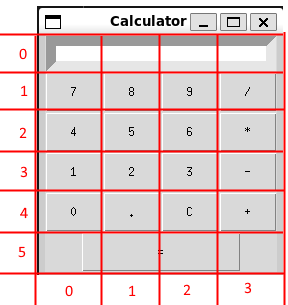

Note: ako ne postavite redove i stupce između, bilo koji broj se ponaša kao da je uzastopan. Npr red 5 ide iza red 0.

### Povezivanje s funkcionalnošću

```python
btn.bind("<Button-1>", on_click)
root.bind("<KeyPress>", on_keypress)
```

- `btn.bind` povezuje funkcionalnost samo s jednim gumbom.
- `root.bind` povezuje funkcionalnost s cijelom aplikacijom.

Prvi argument je tip reakcije, tj "event": 
- Gumbi na mišu:
    - `<Button-X>` (može i samo <1>)
    - `<ButtonRelease-X>`
    - `<Double-Button-X>`
    - `<Triple-Button-X>`
- Kretanje miša:
    - `<Motion>`
    - `<FocusIn>`
    - `<FocusOut>`
- Klik u polje:
    - `<Enter>`
    - `<Leave>`
- Tipkovnica
    - `<Return>` ....
    - `<Key>`
    - a
    - `<Shift-Up>`, `<Alt-Down>`, ...
- Resize prozora
    - `<Configure>`

Drugi argument je funkcija koja se tada poziva. Funkcija automatski dobije cijeli event za korištenje.

### Funkcionalnost

Pišete funkciju kao i svaku drugu. Dodatne stvari vezane za tkinter:

- funkcija u bind automatski dobije event
- eventovi su međusobno drugačiji, pa treba vidjeti od čega se sastoje
- funkcije imaju automatski pristup widgetima u aplikaciji
- tk.END je specijalna konstanta, predstavlja string end
- za ostale konstante: `[c for c in dir(tk) if c.isupper()]`


## Kod

In [10]:
import tkinter as tk

def on_click(event):
    btn_text = event.widget["text"]
    if btn_text == "=":
        try:
            result = str(eval(entry.get()))
            entry.delete(0, tk.END)
            entry.insert(tk.END, result)
        except:
            entry.delete(0, tk.END)
            entry.insert(tk.END, "Error")
    elif btn_text == "C":
        entry.delete(0, tk.END)
    else:
        entry.insert(tk.END, btn_text)

def on_keypress(event):
    if event.char == '\r':
        try:
            result = str(eval(entry.get()))
            entry.delete(0, tk.END)
            entry.insert(tk.END, result)
        except:
            entry.delete(0, tk.END)
            entry.insert(tk.END, "Error")
    else:
        entry.insert(tk.END, event.char)

root = tk.Tk()
root.title("Calculator")

entry = tk.Entry(root, font=("Arial", 18), justify='right', bd=10)
root.bind("<Return>", on_keypress)
root.bind("<KeyPress>", on_keypress)

entry.grid(row=0, column=0, columnspan=4, sticky="news")

buttons = [
    '7', '8', '9', '/',
    '4', '5', '6', '*',
    '1', '2', '3', '-',
    '0', '.', 'C', '+'
]

for i, text in enumerate(buttons):
    row, col = divmod(i, 4)
    btn = tk.Button(root, text=text, font=("Arial", 16), height=2, width=5)
    btn.grid(row=row + 1, column=col)
    btn.bind("<Button-1>", on_click)

eq_btn = tk.Button(root, text="=", font=("Arial", 16), height=2, width=22)
eq_btn.grid(row=5, column=0, columnspan=4)
eq_btn.bind("<Button-1>", on_click)

root.mainloop()


# PyQT/PySide

```python

from PyQt5.QtCore import Qt
from PyQt5.QtWidgets import QApplication, QWidget, QVBoxLayout, QGridLayout, QPushButton, QLineEdit
import sys

class Calculator(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Calculator")
        self.create_ui()

    def create_ui(self):
        layout = QVBoxLayout()
        self.input_field = QLineEdit()
        self.input_field.setReadOnly(False)
        layout.addWidget(self.input_field)

        grid = QGridLayout()
        buttons = [
            '7', '8', '9', '/',
            '4', '5', '6', '*',
            '1', '2', '3', '-',
            '0', '.', 'C', '+'
        ]

        for i, text in enumerate(buttons):
            btn = QPushButton(text)
            btn.clicked.connect(self.on_click)
            grid.addWidget(btn, i // 4, i % 4)

        eq_btn = QPushButton("=")
        eq_btn.clicked.connect(self.on_click)
        grid.addWidget(eq_btn, 4, 0, 1, 4)

        layout.addLayout(grid)
        self.setLayout(layout)

    def on_click(self):
        sender = self.sender().text()
        if sender == "=":
            try:
                result = str(eval(self.input_field.text()))
                self.input_field.setText(result)
            except:
                self.input_field.setText("Error")
        elif sender == "C":
            self.input_field.clear()
        else:
            self.input_field.setText(self.input_field.text() + sender)

    def keyPressEvent(self, event):
        if event.key() in (Qt.Key_Return, Qt.Key_Enter):
            try:
                result = str(eval(self.input_field.text()))
                self.input_field.setText(result)
            except:
                self.input_field.setText("Error")

app = QApplication(sys.argv)
calc = Calculator()
calc.show()
sys.exit(app.exec_())


```

# PySimpleGUI

## Primjer kalkulator

```python

import PySimpleGUI as sg

# Define calculator layout
layout = [
    [sg.Input(size=(20, 1), key='-INPUT-', justification='right', font=('Arial', 18))],
    [sg.Button('7'), sg.Button('8'), sg.Button('9'), sg.Button('/')],
    [sg.Button('4'), sg.Button('5'), sg.Button('6'), sg.Button('*')],
    [sg.Button('1'), sg.Button('2'), sg.Button('3'), sg.Button('-')],
    [sg.Button('0'), sg.Button('.'), sg.Button('C'), sg.Button('+')],
    [sg.Button('=', expand_x=True)]
]

# Create the window
window = sg.Window('Simple Calculator', layout, return_keyboard_events=True, finalize=True)

# Input buffer
expression = ''

while True:
    event, values = window.read()
    if event in (sg.WIN_CLOSED, 'Escape'):
        break

    if event in '1234567890.+-*/':
        expression += event
        window['-INPUT-'].update(expression)

    elif event == 'C' or event == 'Delete':
        expression = ''
        window['-INPUT-'].update('')

    elif event == '=' or event == 'Return':
        try:
            result = str(eval(expression))
            window['-INPUT-'].update(result)
            expression = result  # So you can keep calculating from result
        except:
            window['-INPUT-'].update('Error')
            expression = ''

    elif event in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', '+', '-', '*', '/']:
        expression += event
        window['-INPUT-'].update(expression)

    # Handle button clicks (GUI input)
    elif event in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '.', '+', '-', '*', '/', '=', 'C']:
        if event == '=':
            try:
                result = str(eval(expression))
                window['-INPUT-'].update(result)
                expression = result
            except:
                window['-INPUT-'].update('Error')
                expression = ''
        elif event == 'C':
            expression = ''
            window['-INPUT-'].update('')
        else:
            expression += event
            window['-INPUT-'].update(expression)

window.close()


```

## Upute

### Kreiranje prozora

```python
import PySimpleGUI as sg
layout = [[]]
window = sg.Window('Simple Calculator', layout, return_keyboard_events=True, finalize=True)
```

### Text input

```python
sg.Input(size=(20, 1), key='-INPUT-', justification='right', font=('Arial', 18))
```
https://docs.pysimplegui.com/en/latest/documentation/module/elements/input/

### Button

```python
sg.Button('7')
```
https://docs.pysimplegui.com/en/latest/documentation/module/elements/button/

### Pozicioniranje u prozor

Nema posebne funkcionalnosti.

Napravite listu lista i to date u argument za sg.Window(). PySimpleGUI posloži layout po tom principu.

### Main loop

### Povezivanje s funkcionalnošću

### Funkcionalnost

In [1]:
import PySimpleGUI as sg
layout = [
    [sg.Input(size=(20, 1), key='-INPUT-', justification='right', font=('Arial', 18))]
    ]
window = sg.Window('Simple Calculator', layout, return_keyboard_events=True, finalize=True)

## Kod

In [32]:
import PySimpleGUI as sg

# Define calculator layout
layout = [
    [sg.Input(size=(20, 1), key='-INPUT-', justification='right', font=('Arial', 18))],
    [sg.Button('7'), sg.Button('8'), sg.Button('9'), sg.Button('/')],
    [sg.Button('4'), sg.Button('5'), sg.Button('6'), sg.Button('*')],
    [sg.Button('1'), sg.Button('2'), sg.Button('3'), sg.Button('-')],
    [sg.Button('0'), sg.Button('.'), sg.Button('C'), sg.Button('+')],
    [sg.Button('=', expand_x=True)]
]

# Create the window
window = sg.Window('Simple Calculator', layout, return_keyboard_events=True, finalize=True)

# Input buffer
expression = ''

keypad_codes = {
    'KP_End:87': '1',
    'KP_Down:88': '2',
    'KP_Next:89': '3',
    'KP_Left:83': '4',
    'KP_Begin:84': '5',
    'KP_Right:85': '6',
    'KP_Home:79': '7',
    'KP_Up:80': '8',
    'KP_Prior:81': '9',
    'KP_Insert:90': '0',
    'KP_Add:86': '+',
    'KP_Subtract:82': '-',
    'KP_Multiply:63': '*',
    'KP_Divide:106': '/'
}

while True:
    event, values = window.read()
    print(event)
    if event in (sg.WIN_CLOSED, 'Escape'):
        break

    if event in '1234567890.+-*/':
        expression += event
        window['-INPUT-'].update(expression)

    elif event == 'C' or event == 'Delete':
        expression = ''
        window['-INPUT-'].update('')

    elif event == '=' or event == 'Return:36' or event == 'KP_Enter:104':
        try:
            print(expression)
            print(eval(expression))
            result = str(eval(expression))
            window['-INPUT-'].update(result)
            expression = result  # So you can keep calculating from result
        except:
            window['-INPUT-'].update('Error')
            expression = ''
    
    elif ':' in event and '_' not in event:
        num = event.split(':')[0]
        expression += event
        window['-INPUT-'].update(expression)

    elif ':' in event and 'KP_' in event:
        num = keypad_codes[event]
        expression += num
        window['-INPUT-'].update(expression)


window.close()


Shift_L:50
None


# Pygame

## Primjer kalkulator

```python

import pygame
pygame.init()

WIDTH, HEIGHT = 320, 480
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Calculator")

font = pygame.font.SysFont("Arial", 32)
input_text = ""

buttons = [
    ['7', '8', '9', '/'],
    ['4', '5', '6', '*'],
    ['1', '2', '3', '-'],
    ['0', '.', 'C', '+'],
    ['=']
]

def draw_buttons():
    btn_w, btn_h = 80, 60
    padding = 5
    for r, row in enumerate(buttons):
        for c, label in enumerate(row):
            x = c * (btn_w + padding)
            y = r * (btn_h + padding) + 80
            pygame.draw.rect(screen, (200, 200, 200), (x, y, btn_w, btn_h))
            text = font.render(label, True, (0, 0, 0))
            screen.blit(text, (x + 25, y + 15))

def get_button_clicked(pos):
    x, y = pos
    if y < 80: return None
    row = (y - 80) // 65
    col = x // 85
    try:
        return buttons[row][col]
    except:
        return None

running = True
while running:
    screen.fill((255, 255, 255))
    pygame.draw.rect(screen, (230, 230, 230), (0, 0, WIDTH, 80))
    input_render = font.render(input_text, True, (0, 0, 0))
    screen.blit(input_render, (10, 25))

    draw_buttons()
    pygame.display.flip()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            key = get_button_clicked(pygame.mouse.get_pos())
            if key:
                if key == "=":
                    try:
                        input_text = str(eval(input_text))
                    except:
                        input_text = "Error"
                elif key == "C":
                    input_text = ""
                else:
                    input_text += key
        elif event.type == pygame.KEYDOWN:
            if event.unicode.isprintable() or event.key in [pygame.K_RETURN, pygame.K_BACKSPACE]:
                if event.key == pygame.K_RETURN:
                    try:
                        input_text = str(eval(input_text))
                    except:
                        input_text = "Error"
                elif event.key == pygame.K_BACKSPACE:
                    input_text = input_text[:-1]
                else:
                    input_text += event.unicode

pygame.quit()

```

## Upute

### Kreiranje prozora

```python
import pygame
pygame.init()
WIDTH, HEIGHT = 320, 480
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Calculator")
```
https://www.pygame.org/docs/ref/display.html#pygame.display.set_mode

### Crtanje objekata

```python
pygame.draw.rect(screen, (200, 200, 200), (x, y, btn_w, btn_h))
```
https://www.pygame.org/docs/ref/draw.html#pygame.draw.rect

### Prikaz na ekran

```python
screen.blit(input_render, (10, 25))
pygame.display.flip()
```

### Hvatanje tipki i miša

```python
for event in pygame.event.get():
    if event.type == pygame.MOUSEBUTTONDOWN:
        pygame.mouse.get_pos()
    elif event.type == pygame.KEYDOWN:
        if event.key == pygame.K_RETURN:
            event.unicode
```


### Povezivanje s funkcionalnošću

Nema posebne povezanosti, ako detektiraš tipku ili miša ručno pokreneš funkciju.

### Main loop

```python
while True:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            break
pygame.quit()
```

## Kod

In [38]:
import pygame
pygame.init()

WIDTH, HEIGHT = 320, 480
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Calculator")

font = pygame.font.SysFont("Arial", 32)
input_text = ""

buttons = [
    ['7', '8', '9', '/'],
    ['4', '5', '6', '*'],
    ['1', '2', '3', '-'],
    ['0', '.', 'C', '+'],
    ['=']
]

def draw_buttons():
    btn_w, btn_h = 80, 60
    padding = 5
    for r, row in enumerate(buttons):
        for c, label in enumerate(row):
            x = c * (btn_w + padding)
            y = r * (btn_h + padding) + 80
            pygame.draw.rect(screen, (200, 200, 200), (x, y, btn_w, btn_h))
            text = font.render(label, True, (0, 0, 0))
            screen.blit(text, (x + 25, y + 15))

def get_button_clicked(pos):
    x, y = pos
    if y < 80: return None
    row = (y - 80) // 65
    col = x // 85
    try:
        return buttons[row][col]
    except:
        return None

running = True
while running:
    screen.fill((255, 255, 255))
    pygame.draw.rect(screen, (230, 230, 230), (0, 0, WIDTH, 80))
    input_render = font.render(input_text, True, (0, 0, 0))
    screen.blit(input_render, (10, 25))

    draw_buttons()
    pygame.display.flip()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            key = get_button_clicked(pygame.mouse.get_pos())
            if key:
                if key == "=":
                    try:
                        input_text = str(eval(input_text))
                    except:
                        input_text = "Error"
                elif key == "C":
                    input_text = ""
                else:
                    input_text += key
        elif event.type == pygame.KEYDOWN:
            if event.unicode.isprintable() or event.key in [pygame.K_RETURN, pygame.K_BACKSPACE, pygame.K_KP_ENTER]:
                if event.key == pygame.K_RETURN or event.key == pygame.K_KP_ENTER:
                    try:
                        input_text = str(eval(input_text))
                    except:
                        input_text = "Error"
                elif event.key == pygame.K_BACKSPACE:
                    input_text = input_text[:-1]
                else:
                    input_text += event.unicode

pygame.quit()
